In [1]:
import os
import shutil
import numpy as np
import nibabel as nib
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import mean_absolute_error as mae

plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (12, 10)

/home/srivathsa/miniconda3/envs/mmt/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Figure size 432x288 with 0 Axes>

In [2]:
def preprocess_data(data, con_idxs=[0, 2, 3, 4]):
    data = data[0]
    data = data.transpose(1, 0, 2, 3)
    data = data[con_idxs]
    for idx in np.arange(data.shape[0]):
        data[idx] = data[idx] / data[idx].mean()
        data[idx] = np.clip(data[idx], 0, data[idx].max())
    
    data = data.astype(np.float32)
    return data

def visualize_data(patient_id, sl_idx, 
                   src_path='/home/srivathsa/projects/studies/gad/stanford/preprocess/data_mmt/full_brain/train'):
    fpath_npy = os.path.join(src_path, patient_id, '{:03d}.npy'.format(sl_idx))
    img = np.load(fpath_npy)
    print(img.shape)
    img_stack = [d for d in img]
    img_disp = np.hstack(img_stack)
    plt.imshow(img_disp)

In [ ]:
data = np.load('/home/srivathsa/projects/studies/gad/stanford/preprocess/data_256_fb/Patient_0086.npy')
print(data.shape)

In [ ]:
plt.imshow(data[4, 80])

(4, 512, 512)


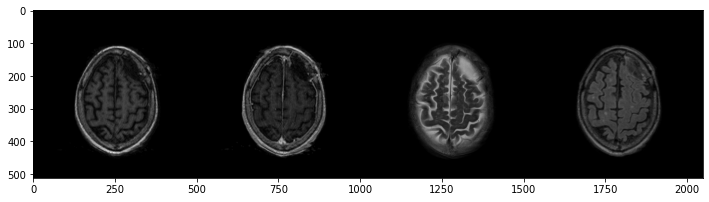

In [41]:
visualize_data('Patient_0091', sl_idx=130, 
               src_path='/home/srivathsa/projects/studies/gad/stanford/preprocess/data_mmt/full_brain_512/test')

In [ ]:
src_path = '/home/srivathsa/projects/studies/gad/stanford/preprocess/data'
ref_path = '/home/srivathsa/projects/studies/gad/stanford/preprocess/data_mmt/full_brain_256'
dest_path = '/home/srivathsa/projects/studies/gad/stanford/preprocess/data_mmt/full_brain_512'

In [ ]:
split = 'train'

con_idxs = [0, 2, 3, 4]
cases = sorted([f.split('/')[-1] for f in glob('{}/{}/*'.format(ref_path, split))])

# cases =  [
#     'Patient_0001', 'Patient_0002', 'Patient_0003', 'Patient_0004', 'Patient_0005', 'Patient_0006', 
#     'Patient_0007', 'Patient_0008', 'Patient_0009', 'Patient_0010', 'Patient_0011', 'Patient_0012', 
#     'Patient_0013', 'Patient_0014', 'Patient_0015', 'Patient_0016', 'Patient_0017', 'Patient_0018', 
#     'Patient_0019', 'Patient_0020', 'Patient_0021', 'Patient_0022', 'Patient_0023', 'Patient_0024', 
#     'Patient_0025', 'Patient_0026', 'Patient_0027', 'Patient_0028', 'Patient_0029', 'Patient_0030', 
#     'Patient_0031', 'Patient_0032', 'Patient_0033', 'Patient_0034', 'Patient_0035', 'Patient_0036', 
#     'Patient_0037', 'Patient_0038', 'Patient_0039', 'Patient_0040', 'Patient_0041', 'Patient_0042', 
#     'Patient_0043', 'Patient_0044', 'Patient_0045', 'Patient_0046', 'Patient_0048', 'Patient_0049', 
#     'Patient_0050', 'Patient_0051', 'Patient_0052', 'Patient_0053', 'Patient_0054', 'Patient_0055', 
#     'Patient_0056', 'Patient_0057', 'Patient_0058', 'Patient_0059', 'Patient_0060', 'Patient_0061', 
#     'Patient_0062', 'Patient_0063', 'Patient_0064', 'Patient_0065', 'Patient_0066', 'Patient_0067', 
#     'Patient_0068', 'Patient_0069', 'Patient_0070', 'Patient_0071', 'Patient_0072', 'Patient_0073', 
#     'Patient_0074', 'Patient_0075', 'Patient_0076', 'Patient_0077', 'Patient_0078', 'Patient_0079', 
#     'Patient_0080', 'Patient_0081', 'Patient_0082', 'Patient_0083', 'Patient_0084'
# ]

# cases = [
#     "Patient_0003",
#     "Patient_0012",
#     "Patient_0024",
#     "Patient_0042",
#     "Patient_0060",
#     "Patient_0334"
# ]

for cnum in tqdm(cases, total=len(cases)):
    try:
        case_data = np.load('{}/{}.npy'.format(src_path, cnum))
        proc_data = preprocess_data(case_data, con_idxs)

        save_path = '{}/{}/{}'.format(dest_path, split, cnum)
        os.makedirs(save_path, exist_ok=True)

        for sl_idx in np.arange(proc_data.shape[1]):
            fname = '{}/{:03d}.npy'.format(save_path, sl_idx)
            np.save(fname, proc_data[:, sl_idx, ...])
    except Exception as err:
        print('ERROR in {}:{}'.format(cnum, err))
        print('data shape -', case_data.shape)

In [ ]:
test_cases = [
    'Patient_0171', 'Patient_0187', 'Patient_0342', 'Patient_0399', 'Patient_0492', 'Patient_0235',
    'Patient_0378', 'Patient_0285', 'Patient_0134', 'Patient_0172', 'Patient_0173', 'Patient_0353',
    'Patient_0408', 'Patient_0486', 'Patient_0526', 'Patient_0144', 'Patient_0155', 'Patient_0165',
    'Patient_0180', 'Patient_0193', 'Patient_0200', 'Patient_0207', 'Patient_0209', 'Patient_0213',
    'Patient_0214', 'Patient_0215', 'Patient_0219', 'Patient_0221', 'Patient_0223', 'Patient_0246',
    'Patient_0101', 'Patient_0112', 'Patient_0125', 'Patient_0139', 'Patient_0148', 'Patient_0152',
    'Patient_0162', 'Patient_0175', 'Patient_0186', 'Patient_0195', 'Patient_0201'
]

all_cases = sorted([f.split('/')[-1].replace('.npy', '') for f in glob('{}/*.npy'.format(src_path))])
train_cases = sorted([c for c in all_cases if c not in test_cases])
val_cases = sorted(np.random.choice(train_cases, 25, replace=False))
src = '/home/srivathsa/projects/studies/gad/stanford/preprocess/data_mmt/zero_gad/train'
dest = '/home/srivathsa/projects/studies/gad/stanford/preprocess/data_mmt/zero_gad/val'
for cnum in val_cases:
    shutil.move('{}/{}'.format(src, cnum), '{}/{}'.format(dest, cnum))

In [ ]:
len(all_cases)

In [ ]:
d = np.load('/home/srivathsa/projects/studies/gad/stanford/preprocess/data_mmt/zero_gad/test/Patient_0134/065.npy')
print(d.shape)
print(d[3].min(), d[3].max())

In [ ]:
d = np.load('/mnt/raid/jiang/projects/SubtleGAN/data/brats2021_slices_crop192x160/train/BraTS2021_00170/127.npy')
print(d.min(), d.max())

In [ ]:
# test dataloader
from dataset_brats import BRATS_dataset, RandomGenerator
from torchvision import transforms
db_train = BRATS_dataset(base_dir='/raid/jiang/projects/SubtleGAN/data/brats_slices/HGG',split="train",transform=transforms.Compose(
                                   [RandomGenerator(scale=[0.9, 1.1], flip=True)]))

In [ ]:
import random
from torch.utils.data import DataLoader
def worker_init_fn(worker_id):
    random.seed(1234 + worker_id)
trainloader = DataLoader(db_train, batch_size=8, shuffle=True, num_workers=8, pin_memory=True, worker_init_fn=worker_init_fn)

In [ ]:
cases = ['Patient_0089', 'Patient_0093', 'Patient_0112']
data_path = '/home/srivathsa/projects/studies/gad/stanford/preprocess/data_256_fb'

for cnum in cases:
    print('Processing {}...'.format(cnum))
    fpath_npy = '{}/{}.npy'.format(data_path, cnum)
    data = np.load(fpath_npy)
    data[3] = np.interp(data[3], (data[3].min(), data[3].max()), (data[0].min(), data[0].max()))
    np.save(fpath_npy, data)

In [ ]:
data[3] = np.interp(data[3], (data[3].min(), data[3].max()), (data[0].min(), data[0].max()))
plt.imshow(np.hstack([data[0, 82], data[2, 82], data[3, 82], data[4, 82]]))

In [ ]:
plt.imshow(data[2, 82])
plt.colorbar()

In [46]:
cases = ['Patient_0089', 'Patient_0093', 'Patient_0112']
bpath = '/home/srivathsa/projects/studies/gad/stanford/preprocess/data_fp64'
dpath = '/home/srivathsa/projects/studies/gad/stanford/preprocess/data'
for cnum in tqdm(cases, total=len(cases)):
    data = np.load('{}/{}.npy'.format(bpath, cnum))
    np.save('{}/{}.npy'.format(dpath, cnum), data.astype(np.float32))

<ipython-input-46-125292a0fedf>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for cnum in tqdm(cases, total=len(cases)):


  0%|          | 0/3 [00:00<?, ?it/s]